In [24]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from colors import *

In [25]:
# Load images (replace with your images)
img1 = np.load('conv.npy').squeeze().transpose(1, 2, 0)
img1 = (img1 + 1) / 2
img1 = np.clip(img1, 0, 1)
img2 = np.load('eca.npy').squeeze().transpose(1, 2, 0)
img2 = (img2 + 1) / 2
img2 = np.clip(img2, 0, 1)

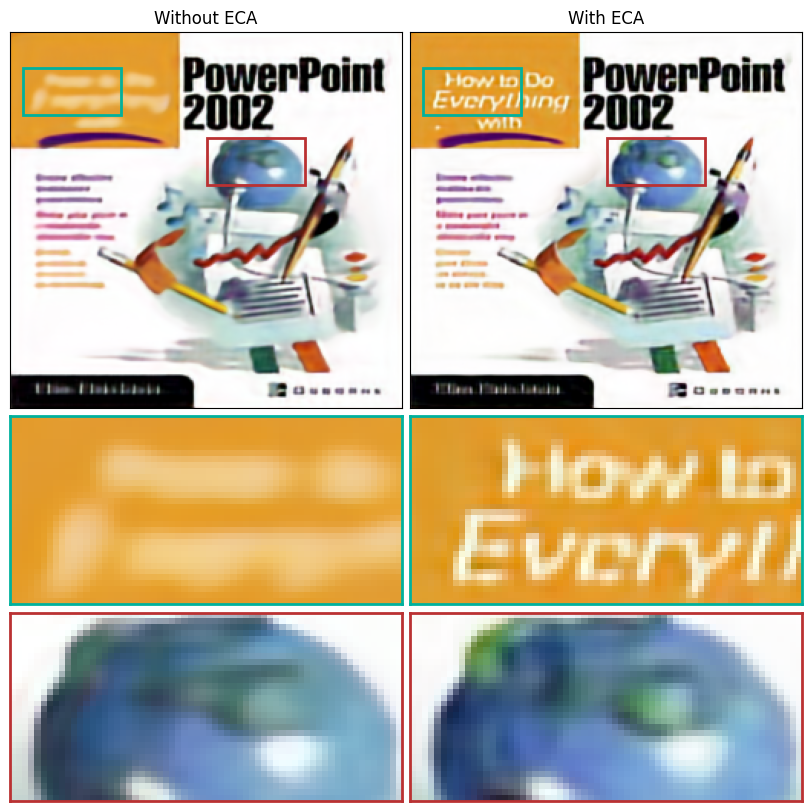

In [26]:
patches_coords = [
    (8, 24, 64, 32),
    (128, 72, 64, 32)
]

colors = [GREEN, RED]
lw = 2

mosaic = [
    ['a', 'b'], 
    ['a', 'b'], 
    ['a1', 'b1'],
    ['a2', 'b2']
]

fig, ax = plt.subplot_mosaic(
    mosaic,
    layout='constrained', 
    figsize=(8, 8)
)

# Display original images
ax["a"].imshow(img1, aspect='auto')
ax["a"].set_title("Without ECA")
ax["b"].imshow(img2, aspect='auto')
ax["b"].set_title("With ECA")

# Draw rectangles on the original images to indicate zoomed-in patches
for i, img in enumerate([img1, img2]):
    for j, (x, y, pw, ph) in enumerate(patches_coords):
        rect = patches.Rectangle((x, y), pw, ph, linewidth=lw, edgecolor=colors[j], facecolor='none')
        ax["a" if i == 0 else "b"].add_patch(rect)

# Extract and resize zoomed-in patches
for j, (x, y, pw, ph) in enumerate(patches_coords):
    patch1 = img1[y:y + ph, x:x + pw]
    patch2 = img2[y:y + ph, x:x + pw]

    # Display patches
    ax["a1" if j == 0 else "a2"].imshow(patch1, aspect='auto')
    ax["b1" if j == 0 else "b2"].imshow(patch2, aspect='auto')

for a in ['a1', 'b1']:
    for b in ['bottom', 'top', 'right', 'left']:
        ax[a].spines[b].set_color(colors[0])
        ax[a].spines[b].set_linewidth(lw)
for a in ['a2', 'b2']:
    for b in ['bottom', 'top', 'right', 'left']:
        ax[a].spines[b].set_color(colors[1])
        ax[a].spines[b].set_linewidth(lw)

# Remove axis ticks
for a in ax.values():
    a.set_xticks([])
    a.set_yticks([])

# plt.tight_layout()
plt.savefig('fig_5.2.png', bbox_inches='tight', pad_inches=0.01, dpi=200)
plt.show()